In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [8]:
data = pd.read_csv("Mall_Customers.csv",index_col=0)

In [9]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [10]:
data.shape

(200, 4)

In [11]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
data.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [17]:
data["Gender"] = data.Gender.map({'Female':0,'Male':1})

In [18]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [19]:
X = data.values[:,[2,3]]

In [20]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [21]:
from sklearn.cluster import KMeans

In [25]:
from warnings import filterwarnings
filterwarnings("ignore")

Text(0, 0.5, 'WSSE')

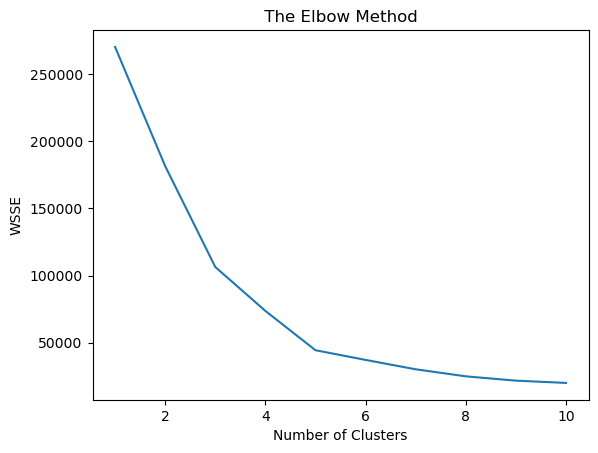

In [26]:
wsse = []
for i in range(1,11):
    kmeans =KMeans(n_clusters =i, random_state=10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1,11),wsse)
plt.title(" The Elbow Method ")
plt.xlabel('Number of Clusters')
plt.ylabel('WSSE')

In [29]:
kmeans = KMeans(n_clusters = 5, random_state = 10)
Y_pred = kmeans.fit_predict(X)

In [30]:
Y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [32]:
data['clusters']=Y_pred
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,1,19,15,39,4
2,1,21,15,81,2
3,0,20,16,6,4
4,0,23,16,77,2
5,0,31,17,40,4
6,0,22,17,76,2
7,0,35,18,6,4
8,0,23,18,94,2
9,1,64,19,3,4


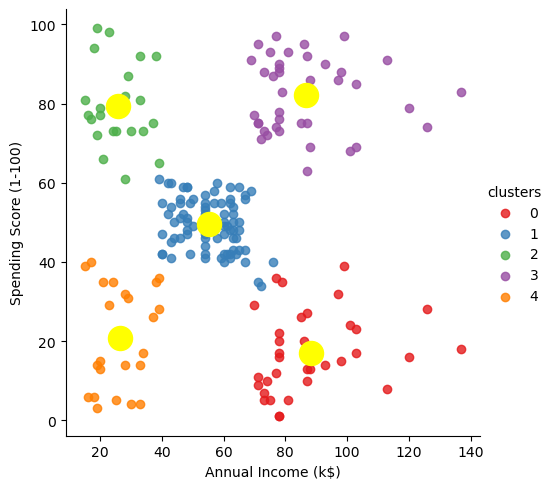

In [36]:
sns.lmplot(data=data, x ='Annual Income (k$)', y= 'Spending Score (1-100)',
          fit_reg=False,
          hue="clusters",palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=300, c='yellow')
plt.show()

In [37]:
data['Clusters']= data.clusters.map({0:'Standard',1:'Sensible',2:'Target',3:'Careless',4:'Careful'})

In [48]:
data_new= data[data['Clusters'] == 'Careful']

In [49]:
data_new

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters,Clusters
CustomerID,,,,,,
124,1,39,69,91,3,Careful
126,0,31,70,77,3,Careful
128,1,40,71,95,3,Careful
130,1,38,71,75,3,Careful
132,1,39,71,75,3,Careful
134,0,31,72,71,3,Careful
136,0,29,73,88,3,Careful
138,1,32,73,73,3,Careful
140,0,35,74,72,3,Careful


In [51]:
data.to_csv("K-MeansOutput.csv",index=True)